# SC1015 Mini Project
## Problem Statement: 
Analysing Used Car Sales Data to understand what attributes affect the Selling Price of Used Cars most strongly.<br>
(1) We aim to construct a neural network to predict the prices of Used Cars  <br>
(2) We will propose which attributes should be considered by a prospective seller looking to list their car for sale. This will assist sellers with setting a reasonable price for their car and improve likelihood of successful sales, maximising profit earned from the sale where possible <br>
(3) We could analyse the most value for money option depending on the mileage, type of car and sale price of the car <br>

## Dataset Used: https://www.kaggle.com/datasets/sandeep1080/used-car-sales/data

## Members
Name: Kee Chong Wei |  Matriculation Number: U2320846D <br>
Name: Jiang Zong Zhe | Matriculation Number: U2322460F <br>
Name: Chew Jin Cheng | Matriculation Number: U2321537J

Workflow:

(1) Identify null values and drop/impute them if necessary 
    If null values account for more than 50% of samples for any category, consider dropping column entirely due to lack of meaningful data
    Else, consider data imputation, replacing null values with suitable values (median, mean)
    
(2) Analyse data types and dataset description to distinguish categorical and numerical variables

(3) _Numerical Data Analysis_ <br>
(3.1) Create Boxplots for each variable to identify if any outliers present <br>
(3.2) Plot correlation matrix to identify which variables correlate strongest with "Sold Price" <br>
(3.3) Perform Linear Regression to get a model which can predict the number of days the pet will likely spend in the shelter <br>

(4) _Categorical Data Analysis_ <br>
(4.1) Identify which values related with Sold Price (multiple box plots of diff type of data in a certain category)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tf.get_logger().setLevel('ERROR')

ModuleNotFoundError: No module named 'seaborn'

In [4]:
data = pd.read_csv("used_car_sales.csv")         

In [5]:
data.head

<bound method NDFrame.head of           ID Distributor Name        Location  Car Name Manufacturer Name  \
0     O2KE17          Carmudi      California  Fortuner            Toyota   
1     EPMPC8        Carousell    Philadelphia     Creta           Hyundai   
2     SQKXAP          Carsome  North Carolina   Scorpio          Mahindra   
3     PWP2QK          Trivett  North Carolina     Plato             Prazo   
4     FNDDKM            Zupps        Portland     Dzire            Maruti   
...      ...              ...             ...       ...               ...   
9995  ZHLCSG              APE           Texas     Yodha              Tata   
9996  2BJE0Y          Carsome        Portland   Scorpio          Mahindra   
9997  4OVJ83            Trust  North Carolina    Seltos               Kia   
9998  M2ECXT          Carsome         Detroit     Swift            Maruti   
9999  28W445              Olx        Portland     Swift            Maruti   

         Car Type  Color    Gearbox  Number o

# (1) Identify null values and drop/impute them if necessary 

In [7]:
null_counts = data.isnull().sum()

print(null_counts)

ID                    0
Distributor Name      0
Location              0
Car Name              0
Manufacturer Name     0
Car Type              0
Color                 0
Gearbox               0
Number of Seats       0
Number of Doors       0
Energy                0
Manufactured Year     0
Price-$               0
Mileage-KM            0
Engine Power-HP       0
Purchased Date        0
Car Sale Status       0
Sold Date             0
Purchased Price-$     0
Sold Price-$          0
Margin-%              0
Sales Agent Name      0
Sales Rating          0
Sales Commission-$    0
Feedback              0
dtype: int64


# No Null values present in any column, hence no need for dropping any data or data imputation.

# (2) Analyse data types and dataset description to distinguish categorical and numerical variables

In [10]:
data.dtypes

ID                    object
Distributor Name      object
Location              object
Car Name              object
Manufacturer Name     object
Car Type              object
Color                 object
Gearbox               object
Number of Seats        int64
Number of Doors        int64
Energy                object
Manufactured Year      int64
Price-$                int64
Mileage-KM             int64
Engine Power-HP        int64
Purchased Date        object
Car Sale Status       object
Sold Date             object
Purchased Price-$      int64
Sold Price-$           int64
Margin-%               int64
Sales Agent Name      object
Sales Rating           int64
Sales Commission-$     int64
Feedback              object
dtype: object

In [11]:
categorical_data_labels = ['ID','Distributor Name','Location','Car Name','Manufacturer Name','Car Type','Color','Gearbox','Energy','Manufactured Year',
                   'Purchased Date','Car Sale Status','Sold Date','Sales Agent Name','Sales Rating','Feedback']
numerical_data_labels = ['Number of Seats','Number of Doors','Price-$','Mileage-KM','Engine Power-HP','Purchased Price-$','Sold Price-$','Margin-%']

In attribute **'Car Sale Status'**, it can be seen that some of the samples describe cars that have not yet been sold. We should only use data for cars that have managed to be sold as inputs to our model. The unsold car data can provide info on boundary values of price or other variables which might cause a car to be undesirable and hence not sold.

In [13]:
sold_cars = data[data['Car Sale Status'] == 'Sold']
unsold_cars = data[data['Car Sale Status'] == 'Unsold']

# (3) Numerical Data Analysis 

In [15]:
sold_cars_numerical_data = data[data['Car Sale Status'] == 'Sold'][numerical_data_labels]

In [16]:
sold_cars_numerical_data.head

<bound method NDFrame.head of       Number of Seats  Number of Doors  Price-$  Mileage-KM  Engine Power-HP  \
1                   5                5     7600       34637              113   
3                   2                2     8800       46250              250   
5                   8                5     9300       38716              200   
14                  5                5     9300       95835              120   
17                  5                5     6900       66534              113   
...               ...              ...      ...         ...              ...   
9961                5                4     7300       37448              115   
9981                4                5     6800       60579              103   
9983                5                5     7600       68001              150   
9993                5                5     7800       96006              120   
9995                3                2     7100       55333              100   

      Pur

# (3.1) Create Boxplots for each variable to identify if any outliers present

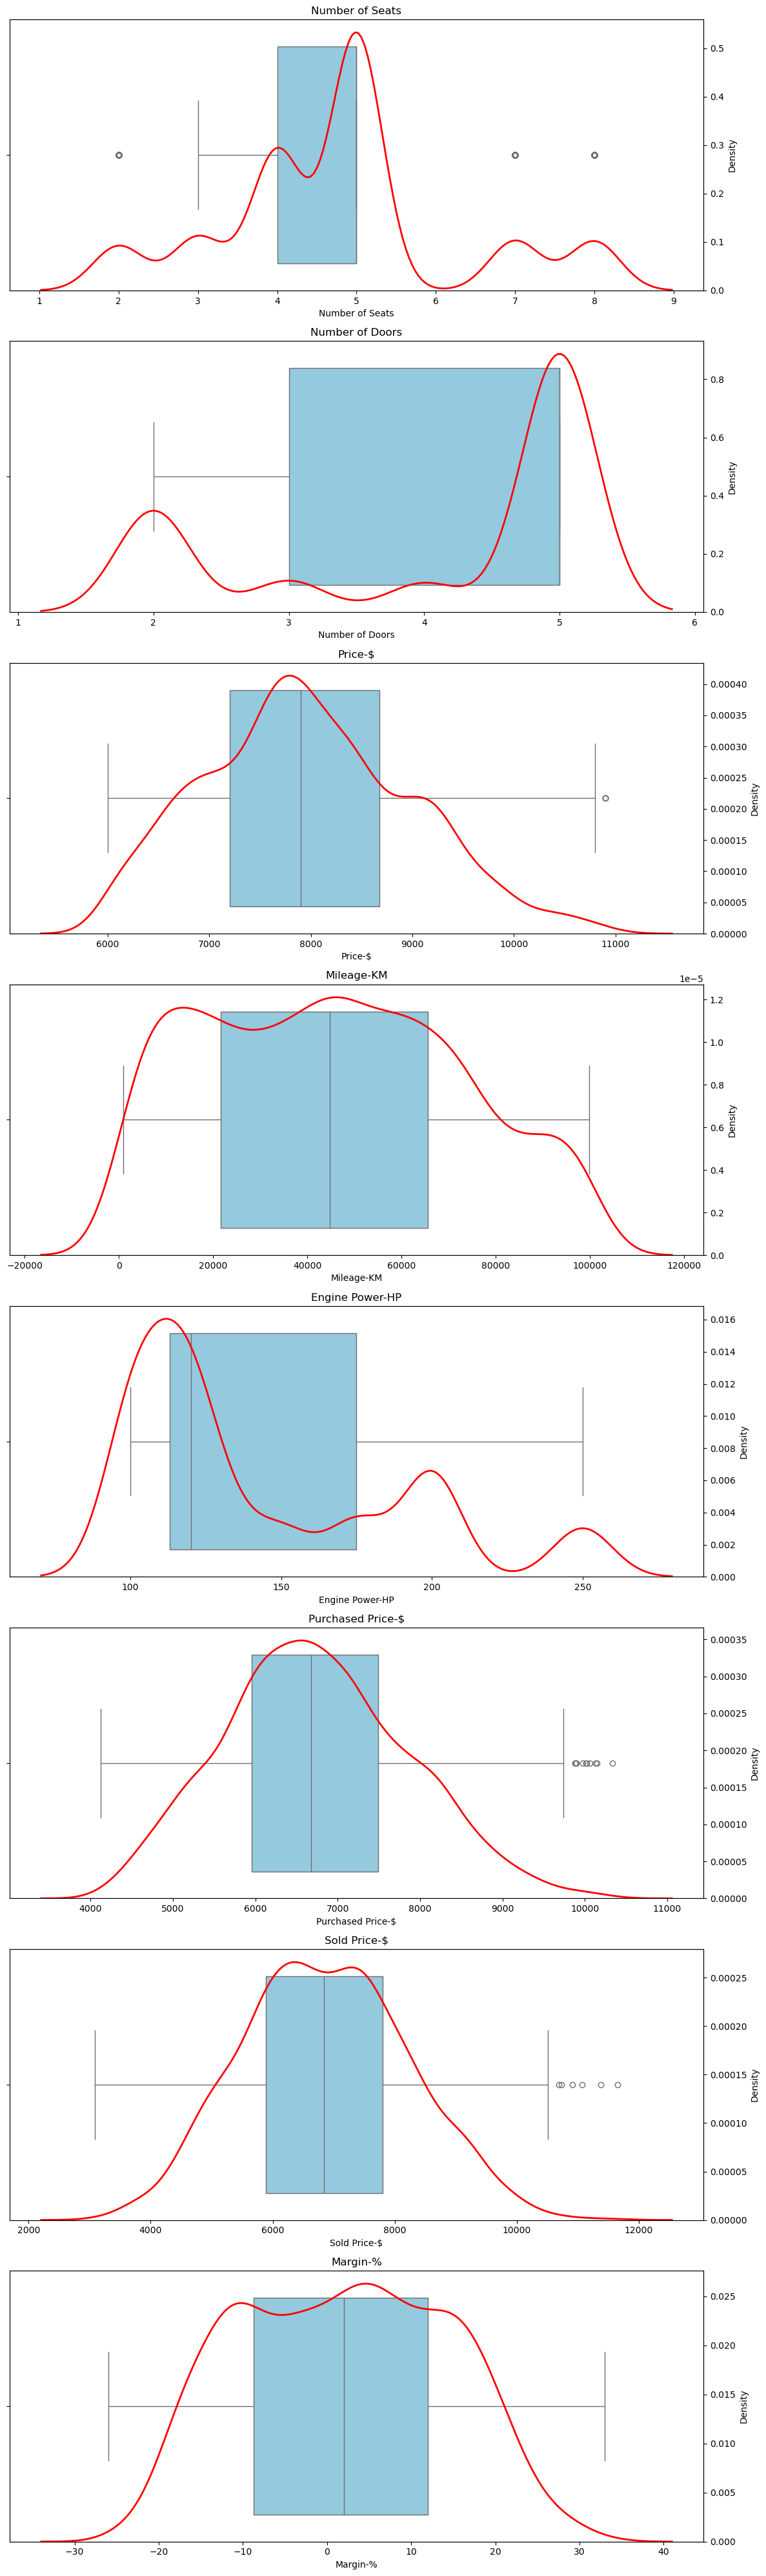

In [18]:
# find if there are outliers in any numerical data

# plt.figure(figsize=(12, 5 * len(sold_cars_numerical_data.columns)))  # Adjust height dynamically
# for i, column in enumerate(sold_cars_numerical_data.columns, 1):
#     plt.subplot(len(sold_cars_numerical_data.columns), 1, i)
#     sns.boxplot(x=sold_cars_numerical_data[column])
#     plt.title(column)

# plt.tight_layout()  
# plt.show()

plt.figure(figsize=(12, 5 * len(sold_cars_numerical_data.columns)))  # Adjust height dynamically

for i, column in enumerate(sold_cars_numerical_data.columns, 1):
    ax_box = plt.subplot(len(sold_cars_numerical_data.columns), 1, i)  
    
    sns.boxplot(x=sold_cars_numerical_data[column], ax=ax_box, color="skyblue")
    
    ax_kde = ax_box.twinx()  
    sns.kdeplot(sold_cars_numerical_data[column], ax=ax_kde, color="red", linewidth=2)

    ax_box.set_title(column)

plt.tight_layout()
plt.show()



Outliers present in following:

**Number of Seats** <br>
**Price-\\$** <br>
**Purchased Price-\\$** <br>
**Sold Price-\\$** 

Given nature of dataset, outliers could simply be special models of car or a rare sale where the distributor or customer overpaid for the car

Explore further by creating Boolean Masks for all variables with outliers and identify if any datapoints are outliers in all of the variables, then decide if outliers should be kept.

In [20]:
sold_cars_numerical_data['Number of Seats'].describe()

count    2166.000000
mean        4.775623
std         1.515273
min         2.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         8.000000
Name: Number of Seats, dtype: float64

In [21]:
seats_IQR = sold_cars_numerical_data['Number of Seats'].quantile(0.75) - sold_cars_numerical_data['Number of Seats'].quantile(0.25)
outliers_number_of_seats = ((sold_cars_numerical_data['Number of Seats'] < (sold_cars_numerical_data['Number of Seats'].quantile(0.25)-1.5*(seats_IQR))) | (sold_cars_numerical_data['Number of Seats'] > (sold_cars_numerical_data['Number of Seats'].quantile(0.75)+1.5*(seats_IQR))))

In [22]:
sold_cars_numerical_data['Price-$'].describe()

count     2166.000000
mean      7972.853186
std       1018.585662
min       6000.000000
25%       7200.000000
50%       7900.000000
75%       8675.000000
max      10900.000000
Name: Price-$, dtype: float64

In [23]:
price_IQR = sold_cars_numerical_data['Price-$'].quantile(0.75) - sold_cars_numerical_data['Price-$'].quantile(0.25)
outliers_price = ((sold_cars_numerical_data['Price-$'] < (sold_cars_numerical_data['Price-$'].quantile(0.25)-1.5*(price_IQR))) | (sold_cars_numerical_data['Price-$'] > (sold_cars_numerical_data['Price-$'].quantile(0.75)+1.5*(price_IQR))))

In [24]:
sold_cars_numerical_data['Purchased Price-$'].describe()

count     2166.000000
mean      6740.786704
std       1123.729436
min       4125.000000
25%       5954.750000
50%       6678.500000
75%       7494.500000
max      10332.000000
Name: Purchased Price-$, dtype: float64

In [25]:
purchased_price_IQR = sold_cars_numerical_data['Purchased Price-$'].quantile(0.75) - sold_cars_numerical_data['Purchased Price-$'].quantile(0.25)
outliers_purchased_price = ((sold_cars_numerical_data['Purchased Price-$'] < (sold_cars_numerical_data['Purchased Price-$'].quantile(0.25)-1.5*(purchased_price_IQR))) | (sold_cars_numerical_data['Purchased Price-$'] > (sold_cars_numerical_data['Purchased Price-$'].quantile(0.75)+1.5*(purchased_price_IQR))))

In [26]:
sold_cars_numerical_data['Sold Price-$'].describe()

count     2166.000000
mean      6868.772392
std       1371.740344
min       3091.000000
25%       5893.000000
50%       6839.500000
75%       7802.250000
max      11657.000000
Name: Sold Price-$, dtype: float64

In [27]:
sold_price_IQR = sold_cars_numerical_data['Sold Price-$'].quantile(0.75) - sold_cars_numerical_data['Sold Price-$'].quantile(0.25)
outliers_sold_price = ((sold_cars_numerical_data['Sold Price-$'] < (sold_cars_numerical_data['Sold Price-$'].quantile(0.25)-1.5*(sold_price_IQR))) | (sold_cars_numerical_data['Sold Price-$'] > (sold_cars_numerical_data['Sold Price-$'].quantile(0.75)+1.5*(sold_price_IQR))))

In [28]:
outliers_all = outliers_number_of_seats & outliers_price & outliers_purchased_price & outliers_sold_price

outlier_rows = sold_cars_numerical_data[outliers_all]

print(outlier_rows)


      Number of Seats  Number of Doors  Price-$  Mileage-KM  Engine Power-HP  \
6383                2                2    10900       70934              250   

      Purchased Price-$  Sold Price-$  Margin-%  
6383              10332         11657        13  


Only one data entry is an outlier in all attributes. Consider removing this datapoint as it might affect training of model

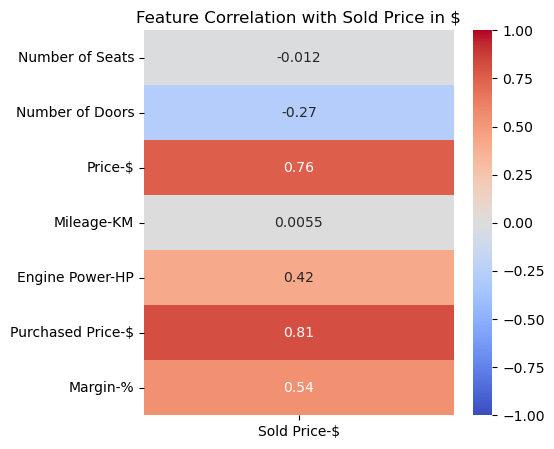

In [30]:
sold_cars_numerical_data_scaled = pd.DataFrame(StandardScaler().fit_transform(sold_cars_numerical_data), columns=sold_cars_numerical_data.columns)
corr_matrix = sold_cars_numerical_data_scaled.corr()
target_corr = corr_matrix[['Sold Price-$']].drop(index='Sold Price-$')
plt.figure(figsize=(5, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Sold Price in $")
plt.show()


Mileage is low correlation, this doesn't really make sense because a car with low mileage should be priced higher than a car with high mileage (hypothesis)

This may be because multiple cars are being compared across different types. Consider exploring correlation by Car Type

In [32]:
sold_cars['Car Type'].value_counts()
hatchback_data = sold_cars[sold_cars['Car Type'] == 'Hatchback']
SUV_data = sold_cars[sold_cars['Car Type'] == 'SUV']
truck_data = sold_cars[sold_cars['Car Type'] == 'Truck']
sedan_data = sold_cars[sold_cars['Car Type'] == 'Sedan']
convertible_data = sold_cars[sold_cars['Car Type'] == 'Convertible']

In [33]:
hatchback_numerical_data = hatchback_data[numerical_data_labels]
SUV_numerical_data = SUV_data[numerical_data_labels]
truck_numerical_data = truck_data[numerical_data_labels]
sedan_numerical_data = sedan_data[numerical_data_labels]
convertible_numerical_data = convertible_data[numerical_data_labels]

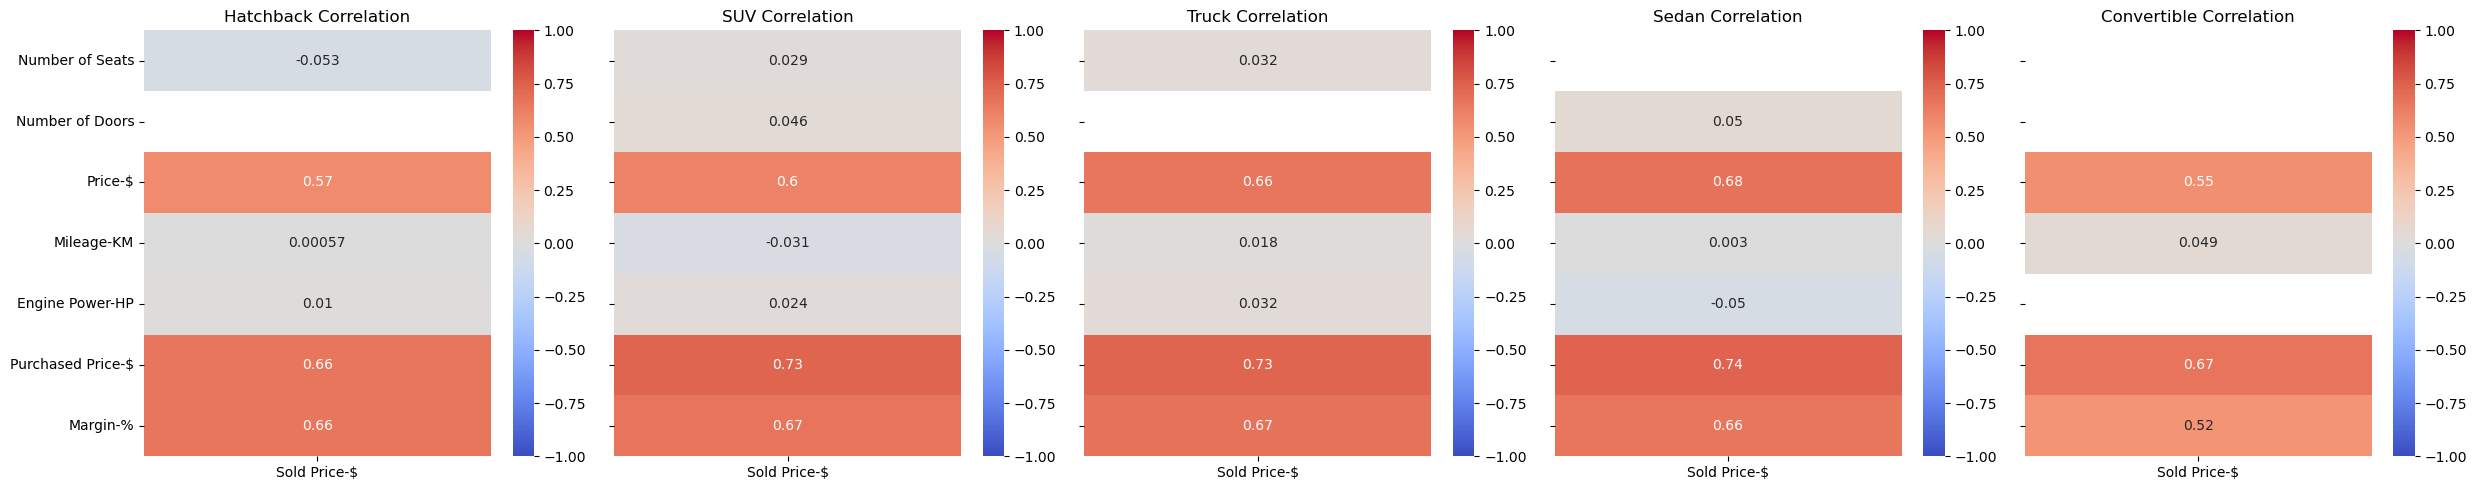

In [34]:
car_types = ['Hatchback', 'SUV', 'Truck', 'Sedan', 'Convertible']
car_data = [hatchback_data, SUV_data, truck_data, sedan_data, convertible_data]

fig, axes = plt.subplots(1, len(car_types), figsize=(5 * len(car_types), 5), sharey=True)

for i, (car_type, data) in enumerate(zip(car_types, car_data)):
    numerical_data = data[numerical_data_labels]
    scaled_data = pd.DataFrame(StandardScaler().fit_transform(numerical_data), columns=numerical_data.columns)
    corr_matrix = scaled_data.corr()
    
    
    target_corr = corr_matrix[['Sold Price-$']].drop(index='Sold Price-$')
    
    
    sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"{car_type} Correlation")

plt.tight_layout()
plt.show()

It seems mileage truly does not affect the Sold Price according to this dataset. The variables with the strongest correlation seem to be:

- Price (According to the dataset description, it represents the Listed Price of the car in USD. We assume that means the market retail price of the car)
- Purchased Price (amount the distributor purchased the car for)
- Margin (profit made on the sale)

Further Analysis

The negligible correlation between mileage and sold price, though counterintuitive, could be due to two possible reasons that require further exploration.

(1) Limited range of mileage values in the dataset
If most cars have similar mileage, there wouldn't be enough variation to establish a strong relationship with price, making it difficult to observe a clear trend.

(2) Presence of sudden price fluctuations at certain mileage thresholds  
Selling prices may not decrease smoothly with mileage; instead, there could be sudden drops or spikes at specific points (e.g., after surpassing a major milestone like 100,000 km). These discontinuities can weaken the overall correlation, even if mileage does influence price in a more complex, nonlinear manner.

To investigate (1): consider a KDE plot

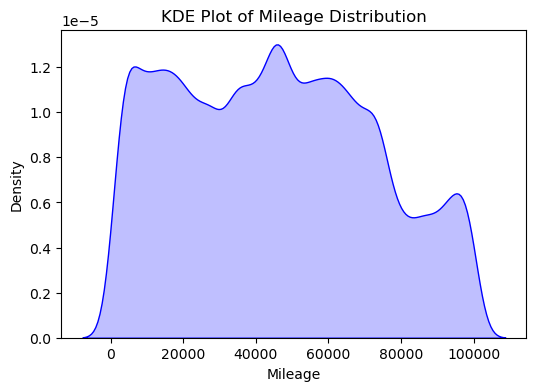

In [37]:
#KDE of Mileage
plt.figure(figsize=(6, 4))
sns.kdeplot(sold_cars_numerical_data['Mileage-KM'], fill=True, color='blue', bw_adjust=0.5)
plt.xlabel("Mileage")
plt.ylabel("Density")
plt.title("KDE Plot of Mileage Distribution")
plt.show()

Based on the KDE plot, the mileage values cover a wide range (from 0 to over 100,000 km). This suggests that mileage is not limited to a narrow range, meaning that point (1) does not hold as the cause for the low correlation with selling price.

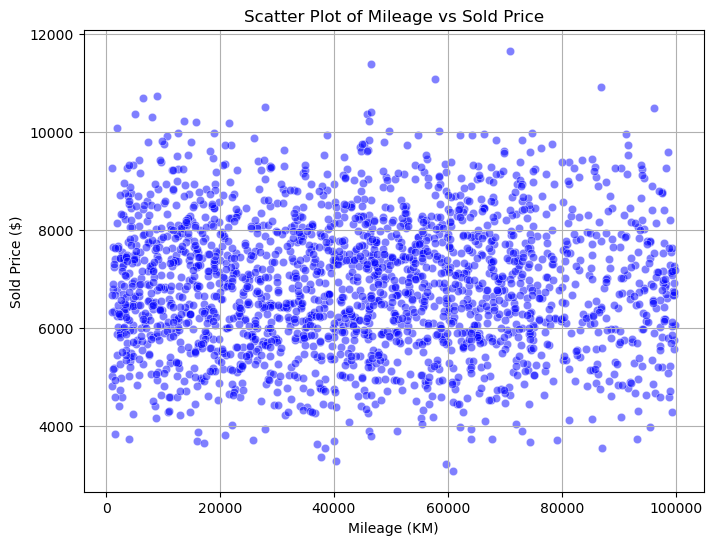

In [39]:
#Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=sold_cars_numerical_data['Mileage-KM'], 
                y=sold_cars_numerical_data['Sold Price-$'], 
                alpha=0.5, color='blue')

plt.xlabel("Mileage (KM)")
plt.ylabel("Sold Price ($)")
plt.title("Scatter Plot of Mileage vs Sold Price")
plt.grid(True)

plt.show()

If there were sudden spikes at threshold values, we would expect to see tight clusters of points past a certain mileage value in the scatter plot. However, the points are evenly distributed with no clear linear relationship between mileage and sold price.

Hence, point (2) doesn't account for the poor correlation between mileage and sold price too.

After further investigation, no meaningful reason has been found to explain the poor correlation between mileage and sold price. We will assume that this weak correlation holds for this dataset and, as a result, will not include mileage as a feature in our model. 

Instead, we will focus on using engine power as the primary predictor to train our model for determining the sold price.

# Categorical Data Analysis

In [43]:
categorical_data_labels = ['ID','Distributor Name','Location','Car Name','Manufacturer Name','Car Type','Color','Gearbox','Energy','Manufactured Year',
                   'Purchased Date','Car Sale Status','Sold Date','Sales Agent Name','Sales Rating','Feedback','Sold Price-$']
sold_cars_categorical_data = data[data['Car Sale Status'] == 'Sold'][categorical_data_labels]

A cursory analysis of the data indicates certain variables can be omitted as they are **not relevant** to qualities of the car that can be controlled by a prospective seller. <br>

These include: <br>
- ID
- Distributor Name
- Sales Agent Name
- Sales Rating
- Car Sale Status
- Feedback

Since Car Names are strongly related to Manufacturer Name in the sense that it wouldn't make much sense for a seller to sell their car with only the Car Model name without the Manufacturer Name, it would be simpler to combine the 2 columns into one variable "Car Name-Manufacturer Name"

In [45]:
sold_cars_categorical_data = sold_cars_categorical_data.drop(columns = ['ID','Distributor Name','Sales Agent Name','Sales Rating','Car Sale Status','Feedback'])

In [46]:
sold_cars_categorical_data['Car Name-Manufacturer Name'] = (
    sold_cars_categorical_data['Car Name'] + ' - ' + sold_cars_categorical_data['Manufacturer Name']
)
sold_cars_categorical_data = sold_cars_categorical_data.drop(columns = ['Car Name','Manufacturer Name'])

Since Sold and Purchased Dates are recorded to the precision of the day, it would be easier to analyse the dates by grouping them by year

In [48]:
sold_cars_categorical_data['Sold Date'] = pd.to_datetime(sold_cars_categorical_data['Sold Date'])
sold_cars_categorical_data['Purchased Date'] = pd.to_datetime(sold_cars_categorical_data['Purchased Date'])
sold_cars_categorical_data['Year Sold'] = sold_cars_categorical_data['Sold Date'].dt.year
sold_cars_categorical_data['Year Purchased'] = sold_cars_categorical_data['Purchased Date'].dt.year


In [49]:
sold_cars_categorical_data['Car Name-Manufacturer Name'].value_counts()

Car Name-Manufacturer Name
Plato - Prazo    162
Name: count, dtype: int64

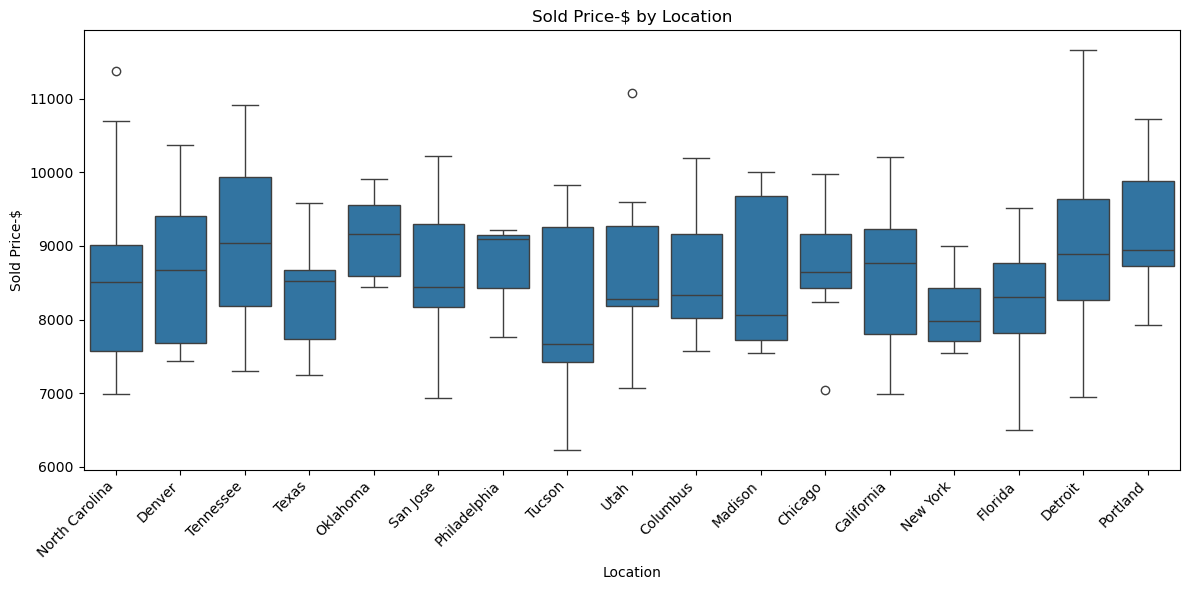

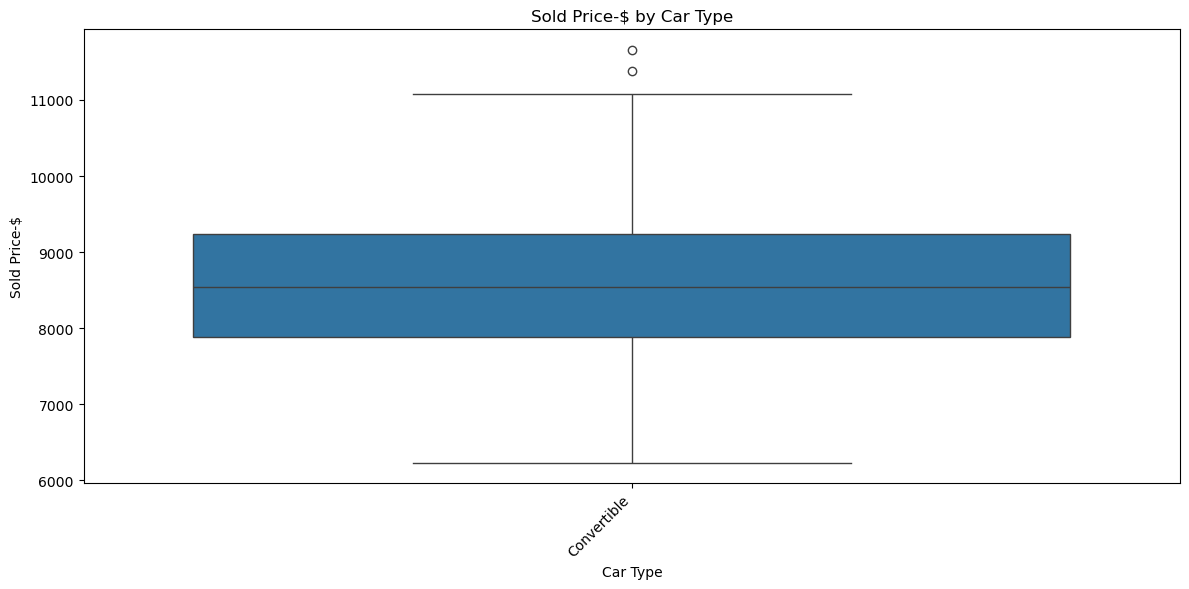

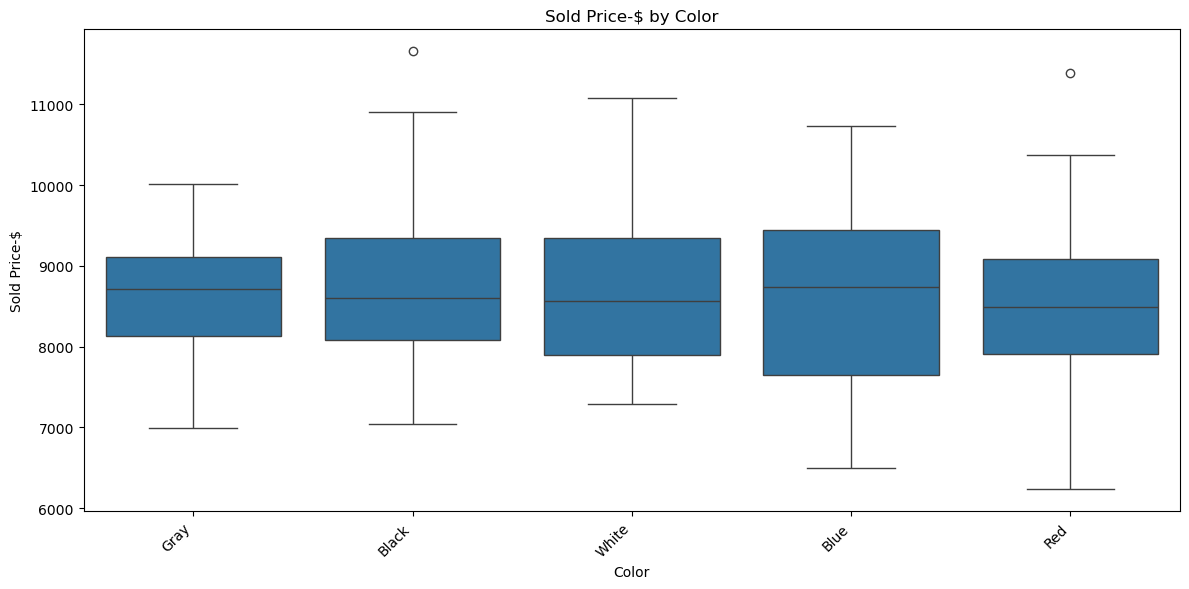

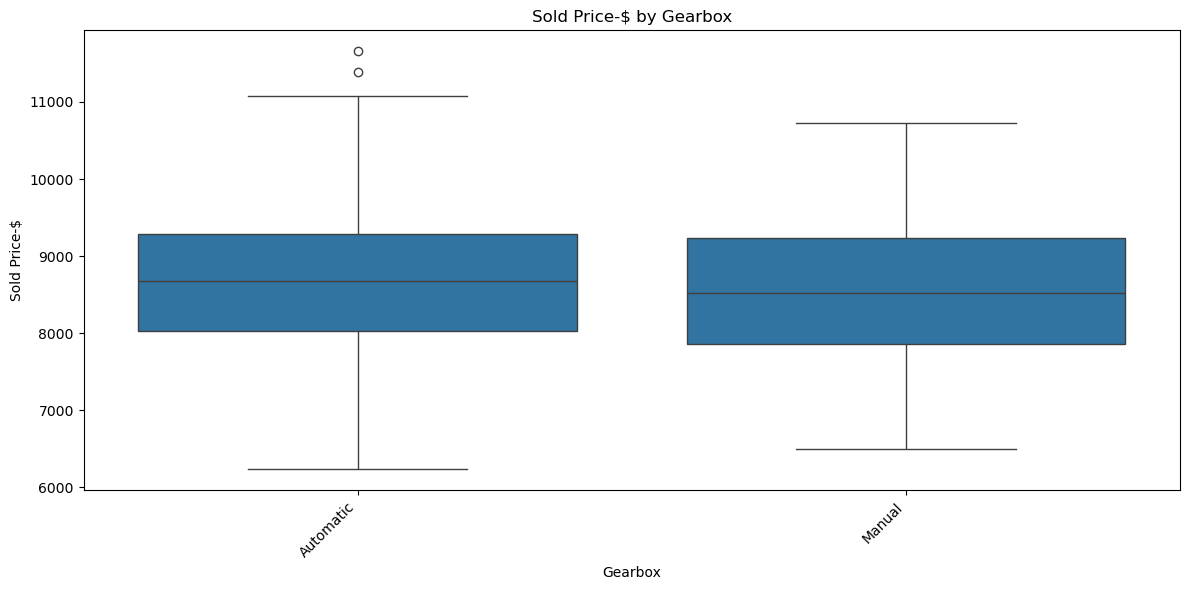

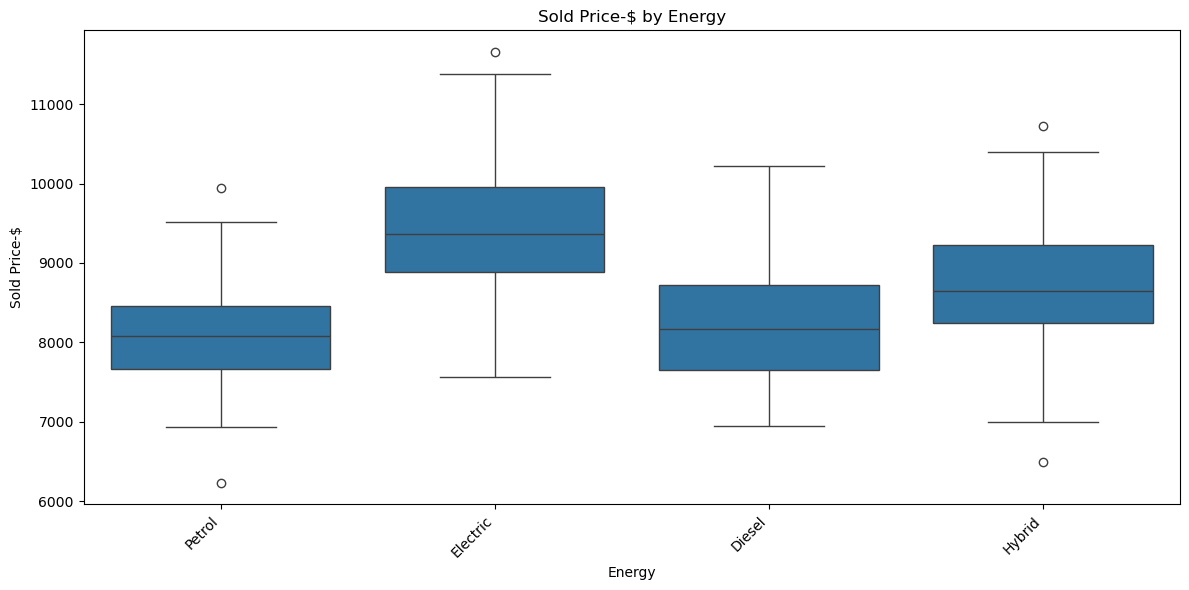

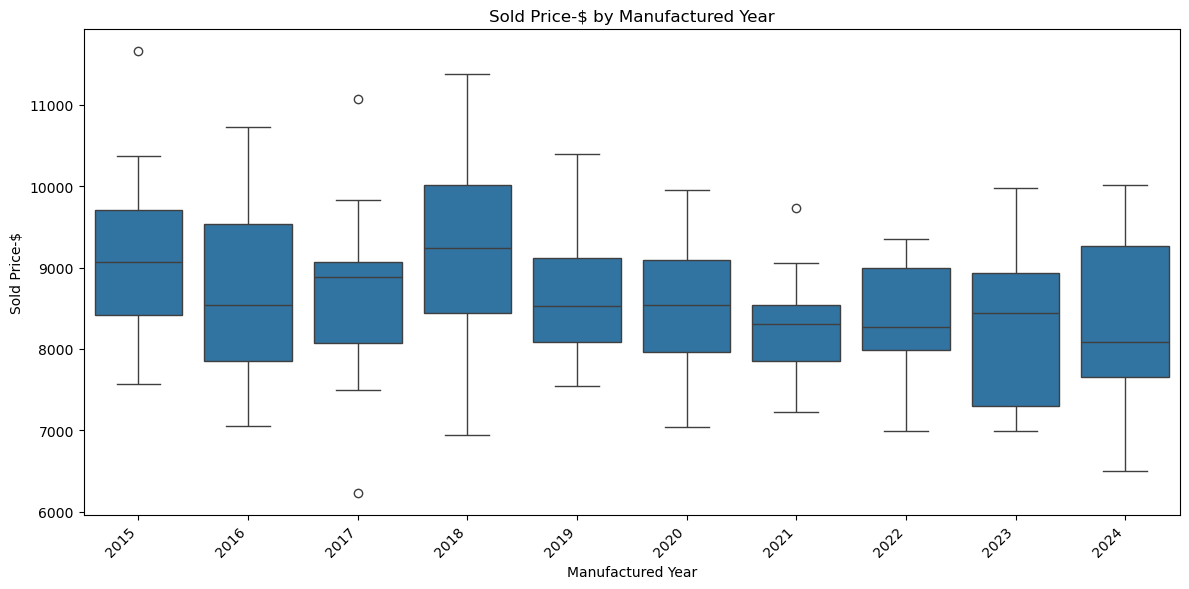

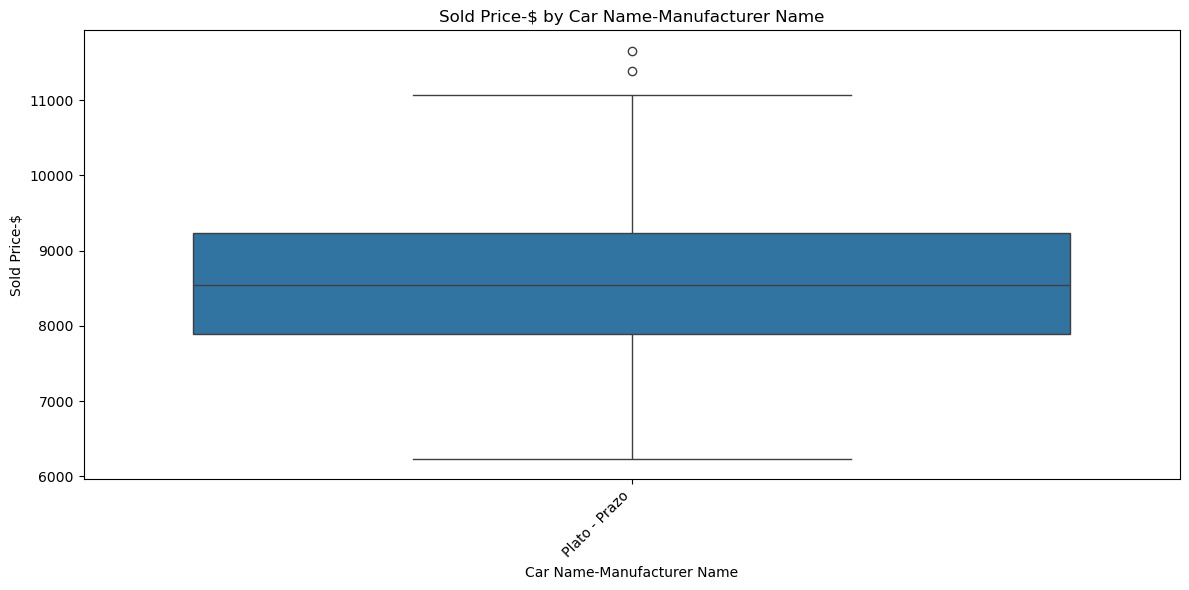

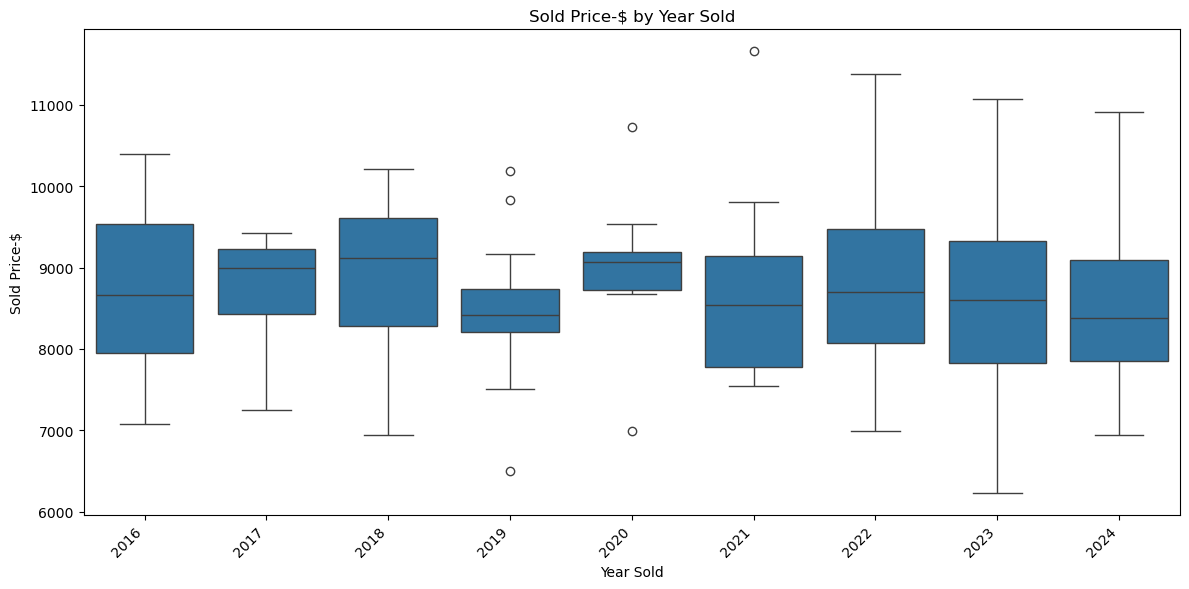

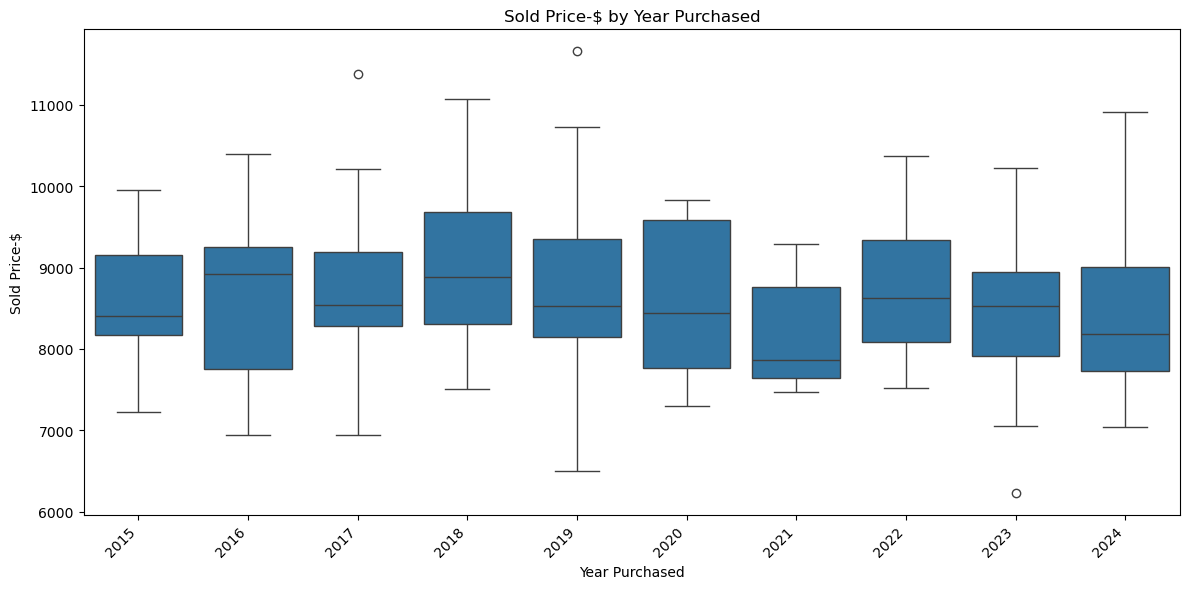

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
target = 'Sold Price-$'
columns = sold_cars_categorical_data.columns
skipped_columns = ['Sold Price-$','Sold Date','Purchased Date']
# Loop through each categorical variable and plot boxplot
for col in columns:
    if col not in skipped_columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=sold_cars_categorical_data[col], y=sold_cars_categorical_data[target])
        plt.title(f'{target} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


By examining the differences in the boxplot for each category in a categorical variable, we can derive if the categorical variable affects Sold Price.

It can be observed that the following variables have a significant effect on Sold Price:
- Car Type
- Energy
- Car Name-Manufacturer Name

Two Layer Perceptron

A two-layer perceptron is a type of artificial neural network that consists of two layers of neurons:
Input layer: This layer takes in the input data.
Hidden layer: A layer of neurons that applies weights, biases, and an activation function to transform the input.
Each neuron in the hidden layer processes the weighted sum of the inputs, adds a bias, and passes the result through an activation function (like ReLU or Sigmoid) to introduce non-linearity.

If we’re considering a two-layer perceptron for just one variable determining another variable:
The input layer has a single neuron (representing one variable).
The hidden layer can still consist of one or more neurons (depending on the complexity).
The output layer will have one neuron to predict the dependent variable.

In [107]:
engine_power = sold_cars_numerical_data['Engine Power-HP'].values.reshape(-1, 1)
sold_price = sold_cars_numerical_data['Sold Price-$'].values.reshape(-1, 1)

engine_power_scaled = StandardScaler().fit_transform(engine_power)
sold_price_scaled = StandardScaler().fit_transform(sold_price)

X_train, X_test, y_train, y_test = train_test_split(engine_power_scaled, sold_price_scaled, test_size=0.2, random_state=42)

model = Sequential()

# Hidden layer (e.g., 64 neurons, can be adjusted)
model.add(Dense(64, input_dim=1, activation='relu'))

# Output layer (1 neuron for sold price prediction)
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1000, verbose=0)

#Evaluate the Model
loss = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 284us/step - loss: 0.7476
